<main style="font-family: TeX Gyre Termes; font-size: 1.2rem">

### MEX #2 - Geyzson Kristoffer
SN:2023-21036

https://uvle.upd.edu.ph/mod/assign/view.php?id=535541

<hr>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from icecream import ic

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.svm import SVC, SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression

from matplotlib.lines import Line2D


# Problem #1

In [2]:
penguin_data = pd.read_csv('penguins_size.csv')
penguin_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
ic(penguin_data.isna().sum())
ic(penguin_data.isnull().sum())

ic| penguin_data.isna().sum(): species               0
                               island                0
                               culmen_length_mm      2
                               culmen_depth_mm       2
                               flipper_length_mm     2
                               body_mass_g           2
                               sex                  10
                               dtype: int64
ic| penguin_data.isnull().sum(): species               0
                                 island                0
                                 culmen_length_mm      2
                                 culmen_depth_mm       2
                                 flipper_length_mm     2
                                 body_mass_g           2
                                 sex                  10
                                 dtype: int64


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# Problem #1-a


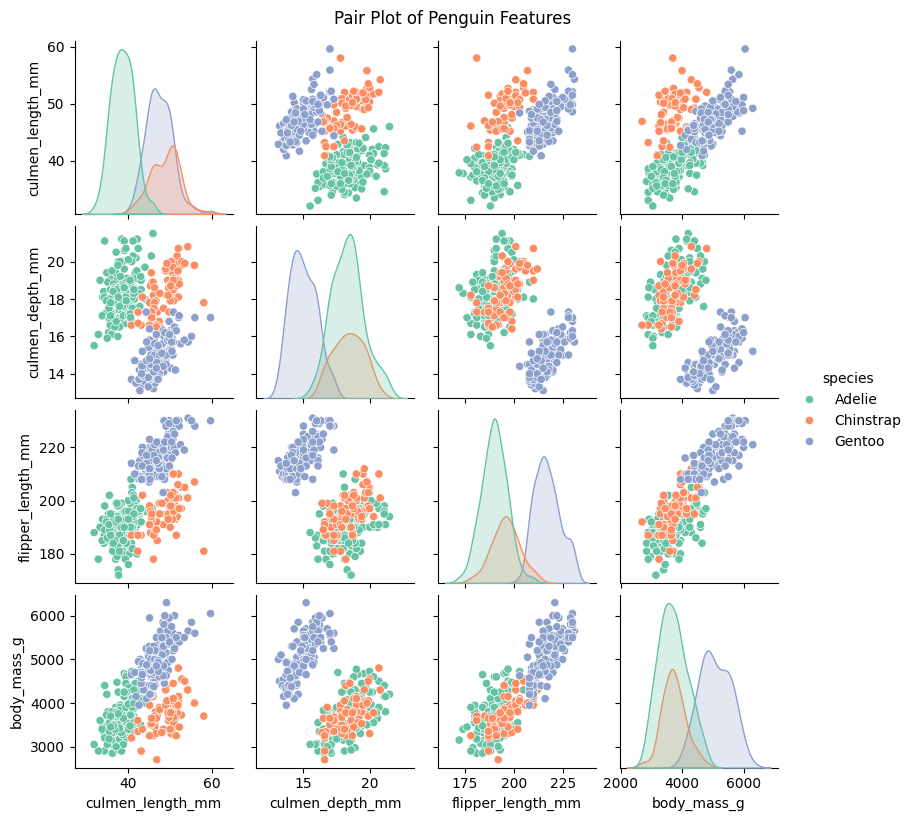

In [4]:
columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']

penguin_data_clean = penguin_data[columns].dropna()

sns.pairplot(penguin_data_clean, hue='species', palette='Set2', diag_kind='kde', height=2)
plt.suptitle('Pair Plot of Penguin Features', y=1.02)
plt.show()


# Problem #1-b


Train Accuracy: 	0.94531
Train Macro Avg F1: 	0.93380


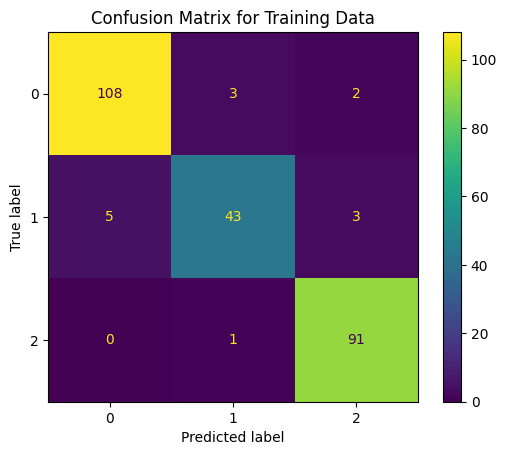

Test Accuracy: 		0.98837
Test Macro Avg F1: 	0.98557


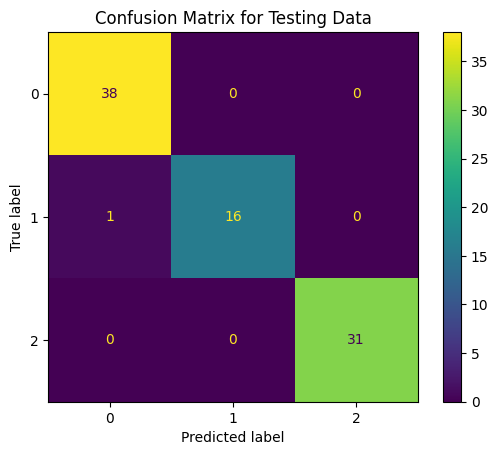

In [5]:
X = penguin_data_clean[['culmen_length_mm', 'flipper_length_mm']]
y = penguin_data_clean['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_confusion = confusion_matrix(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_confusion = confusion_matrix(y_test, y_test_pred)

print(f'Train Accuracy: \t{train_accuracy:.5f}')
print(f'Train Macro Avg F1: \t{train_f1:.5f}')
cm_train = ConfusionMatrixDisplay(confusion_matrix = train_confusion)
cm_train.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()


print(f'Test Accuracy: \t\t{test_accuracy:.5f}')
print(f'Test Macro Avg F1: \t{test_f1:.5f}')
cm_test = ConfusionMatrixDisplay(confusion_matrix = test_confusion)
cm_test.plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()

# Problem #1-c


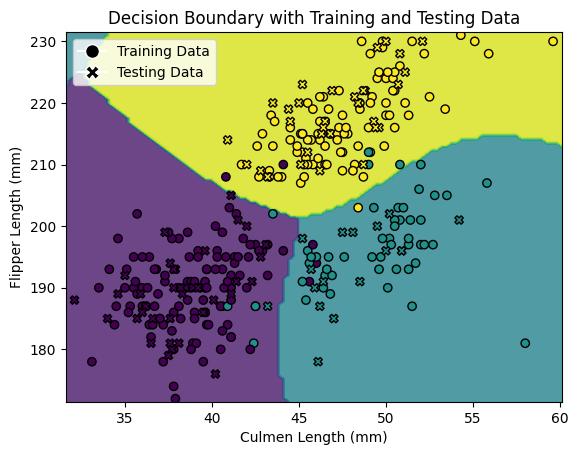

In [6]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

display = DecisionBoundaryDisplay.from_estimator(model, X, alpha=0.8, eps=0.5)
plt.scatter(X_train['culmen_length_mm'], X_train['flipper_length_mm'], c=y_train_encoded, edgecolors="k", marker='o', label='Training Data')
plt.scatter(X_test['culmen_length_mm'], X_test['flipper_length_mm'], c=y_test_encoded, edgecolors="k", marker='X', label='Testing Data')
plt.title('Decision Boundary with Training and Testing Data')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Training Data'),
    Line2D([0], [0], marker='X', color='w', markerfacecolor='k', markersize=10, label='Testing Data')
]
plt.legend(handles=legend_elements)

plt.show()

# Problem #1-d

Train Accuracy: 	0.94922
Train Macro Avg F1: 	0.93930


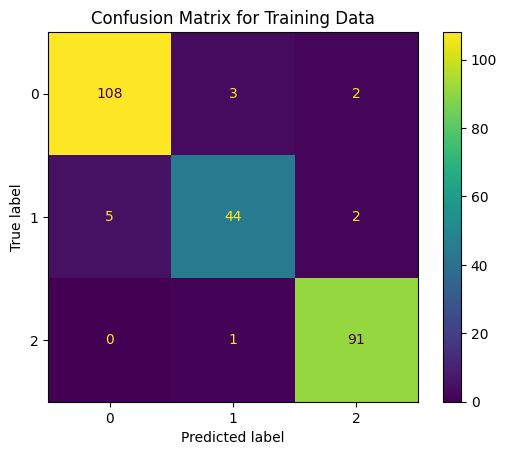

Test Accuracy: 		1.00000
Test Macro Avg F1: 	1.00000


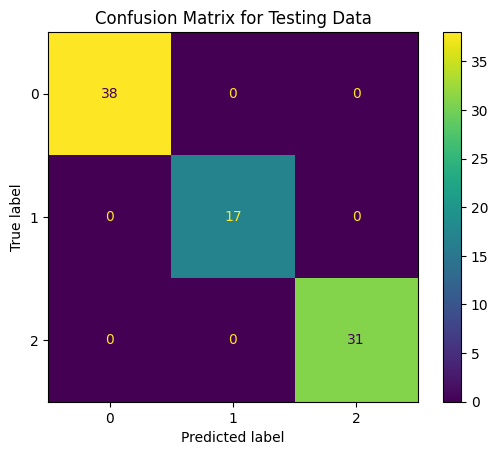

In [7]:

parameters = {
    'svc__C': [0.01, 0.1, 1, 10, 100], 
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__degree': [2, 3, 4, 5],
    'svc__decision_function_shape': ['ovr', 'ovo']
}

random_search = RandomizedSearchCV(model, parameters, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_confusion = confusion_matrix(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_confusion = confusion_matrix(y_test, y_test_pred)

print(f'Train Accuracy: \t{train_accuracy:.5f}')
print(f'Train Macro Avg F1: \t{train_f1:.5f}')
cm_train = ConfusionMatrixDisplay(confusion_matrix = train_confusion)
cm_train.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()


print(f'Test Accuracy: \t\t{test_accuracy:.5f}')
print(f'Test Macro Avg F1: \t{test_f1:.5f}')
cm_test = ConfusionMatrixDisplay(confusion_matrix = test_confusion)
cm_test.plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()

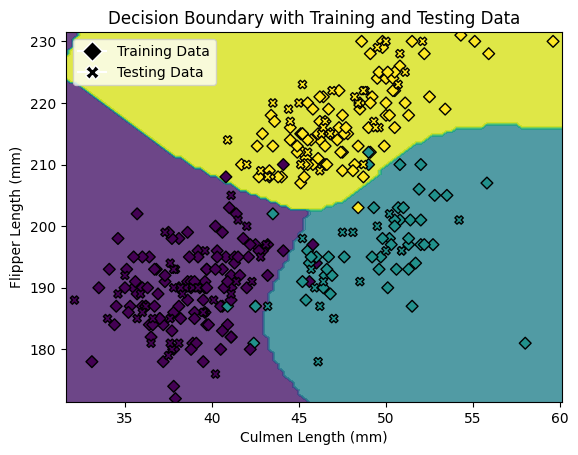

In [8]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

display = DecisionBoundaryDisplay.from_estimator(best_model, X, alpha=0.8, eps=0.5)
plt.scatter(X_train['culmen_length_mm'], X_train['flipper_length_mm'], c=y_train_encoded, edgecolors="k", marker='D', label='Training Data')
plt.scatter(X_test['culmen_length_mm'], X_test['flipper_length_mm'], c=y_test_encoded, edgecolors="k", marker='X', label='Testing Data')
plt.title('Decision Boundary with Training and Testing Data')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')

legend_elements = [
    Line2D([0], [0], marker='D', color='w', markerfacecolor='k', markersize=10, label='Training Data'),
    Line2D([0], [0], marker='X', color='w', markerfacecolor='k', markersize=10, label='Testing Data')
]
plt.legend(handles=legend_elements)

plt.show()

<hr>

# Problem #2

In [9]:
bike_data = pd.read_csv('SeoulBikeData.csv', encoding='latin1')
bike_data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [15]:
ic(bike_data.isna().sum())
ic(bike_data.isnull().sum())

ic| bike_data.isna().sum(): Date                         0
                            Rented Bike Count            0
                            Hour                         0
                            Temperature(°C)              0
                            Humidity(%)                  0
                            Wind speed (m/s)             0
                            Visibility (10m)             0
                            Dew point temperature(°C)    0
                            Solar Radiation (MJ/m2)      0
                            Rainfall(mm)                 0
                            Snowfall (cm)                0
                            Seasons                      0
                            Holiday                      0
                            Functioning Day              0
                            dtype: int64
ic| bike_data.isnull().sum(): Date                         0
                              Rented Bike Count            0
           

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Problem #2-a

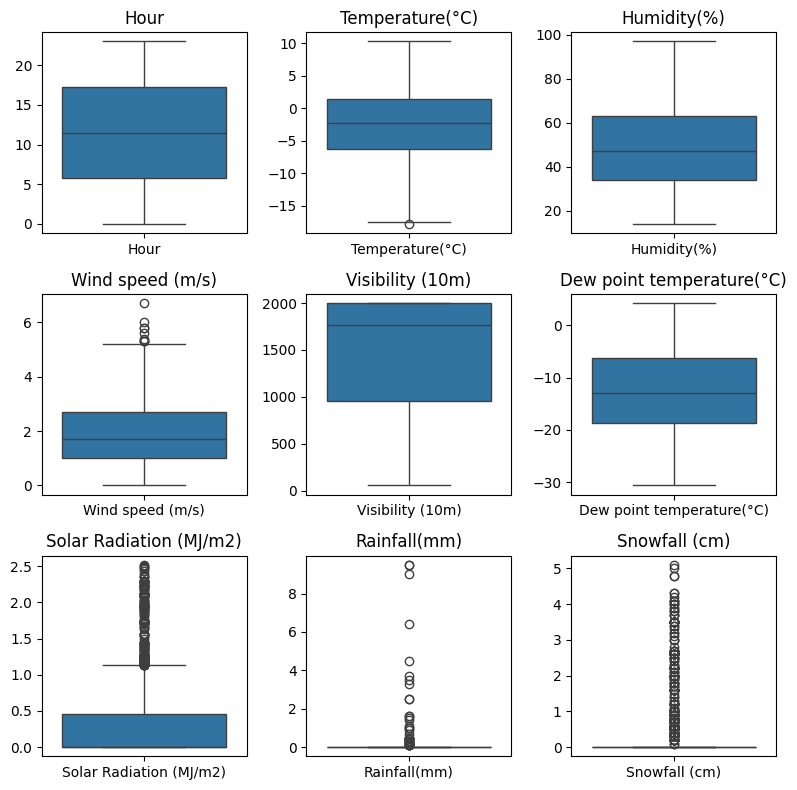

In [21]:
winter_data = bike_data[bike_data['Seasons'] == 'Winter']

columns = [
    'Hour', 
    'Temperature(°C)', 
    'Humidity(%)', 
    'Wind speed (m/s)', 
    'Visibility (10m)', 
    'Dew point temperature(°C)', 
    'Solar Radiation (MJ/m2)', 
    'Rainfall(mm)', 
    'Snowfall (cm)'
]

plt.figure(figsize=(8, 8))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=winter_data[[column]])
    plt.title(column)

plt.tight_layout()
plt.show()


# Problem #2-b

In [28]:
X = winter_data.iloc[:, 2:11]
y = winter_data['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())  
])

model_svr.fit(X_train, y_train)

y_pred = model_svr.predict(X_test)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse_svr:.5f}')


RMSE: 127.07340


# Problem #2-b fine tuning


In [12]:
param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(model_svr, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_svr = grid_search.best_estimator_

y_pred_best_svr = best_svr.predict(X_test)

rmse_best_svr = np.sqrt(mean_squared_error(y_test, y_pred_best_svr))


print(f'Best parameters: {best_params}')
print(f'RMSE: {rmse_best_svr:.5f}')


Best parameters: {'svr__C': 100, 'svr__epsilon': 1, 'svr__kernel': 'rbf'}
RMSE: 112.86469


# Problem #2-c


In [13]:
model_krr = Pipeline([
    ('scaler', StandardScaler()),
    ('krr', KernelRidge(kernel='linear')) 
])

model_krr.fit(X_train, y_train)

y_pred_krr = model_krr.predict(X_test)

rmse_krr = np.sqrt(mean_squared_error(y_test, y_pred_krr))
print(f'RMSE original: {rmse_krr:.5f}')

param_grid_krr = {
    'krr__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'krr__kernel': ['linear', 'poly', 'rbf'],
    'krr__degree': [2, 3, 4],
    'krr__coef0': [0, 1, 2],
    'krr__gamma': [0.01, 0.1, 1, 10]
}

randsearch_krr = RandomizedSearchCV(model_krr, param_grid_krr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
randsearch_krr.fit(X_train, y_train)

best_params = randsearch_krr.best_params_
best_krr = randsearch_krr.best_estimator_

y_pred_krr = best_krr.predict(X_test)
rmse_krr = np.sqrt(mean_squared_error(y_test, y_pred_krr))
print(f'Best parameters: {best_params}')
print(f'RMSE fine tuned: {rmse_krr:.5f}')


RMSE original: 253.38630
Best parameters: {'krr__kernel': 'rbf', 'krr__gamma': 1, 'krr__degree': 3, 'krr__coef0': 2, 'krr__alpha': 0.01}
RMSE fine tuned: 111.66337


# Problem #2-d

In [14]:
model_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'RMSE original: {rmse_lr:.5f}')

param_grid_lr = {
    'lr__fit_intercept': [True, False]
}

grid_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_lr.fit(X_train, y_train)

best_params = grid_lr.best_params_
best_lr = grid_lr.best_estimator_

y_pred_lr = best_lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Best parameters: {best_params}')
print(f'RMSE fine tuned: {rmse_lr:.5f}')

RMSE original: 120.28687
Best parameters: {'lr__fit_intercept': True}
RMSE fine tuned: 120.28687
